(a) Regression: Using any of the data in previous assignment:


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/part1_simple_linear_regression.png'

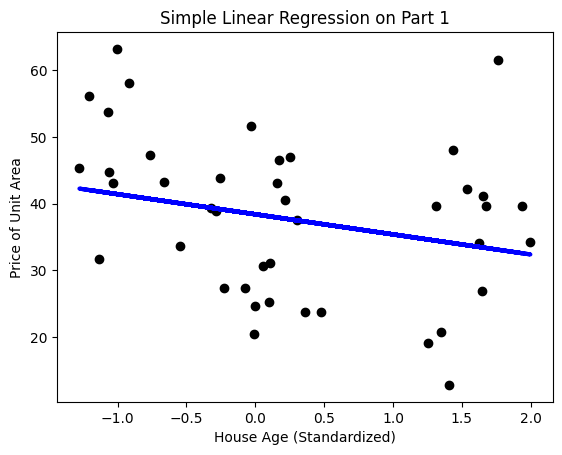

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

RealEstateData = pd.read_excel("/Users/user/Documents/RealEstateDataSet.xlsx")

part1, part2 = train_test_split(RealEstateData, test_size=0.5, random_state=42)

x1 = part1[['X2 house age']]
y1 = part1['Y house price of unit area']
x2 = part2[['X2 house age']]
y2 = part2['Y house price of unit area']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
x1_train_scaled = scaler.fit_transform(x1_train)
x1_test_scaled = scaler.transform(x1_test)
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)

lr1 = LinearRegression()
lr1.fit(x1_train_scaled, y1_train)
y1_pred = lr1.predict(x1_test_scaled)

plt.scatter(x1_test_scaled, y1_test, color='black')
plt.plot(x1_test_scaled, y1_pred, color='blue', linewidth=3)
plt.title('Simple Linear Regression on Part 1')
plt.xlabel('House Age (Standardized)')
plt.ylabel('Price of Unit Area')
plt.savefig('/mnt/data/part1_simple_linear_regression.png')
plt.show()

lr2 = LinearRegression()
lr2.fit(x2_train_scaled, y2_train)
y2_pred = lr2.predict(x2_test_scaled)


plt.scatter(x2_test_scaled, y2_test, color='black')
plt.plot(x2_test_scaled, y2_pred, color='blue', linewidth=3)
plt.title('Simple Linear Regression on Part 2')
plt.xlabel('House Age (Standardized)')
plt.ylabel('Price of Unit Area')
plt.savefig('/mnt/data/part2_simple_linear_regression.png')
plt.show()

b) Regression and Classification using dataset from canvas
Dataset can be found in canvas in:
Files --> LabHelp---> Labs/data/Linear_Regression_data/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.xlx

Goal: 
Create linear model to predict our chance of admition
Create classification tree model to predict probability of chance of admission

In [1]:
#read data from your computer
data = pd.read_csv("")

# Encode categorical feature
le = LabelEncoder()
data["University Rating"] = le.fit_transform(data["University Rating"])

# Feature Scaling (optional)
scaler = StandardScaler()
data[["GRE Score", "TOEFL Score", "SOP", "CGPA"]] = scaler.fit_transform(data[["GRE Score", "TOEFL Score", "SOP",  "CGPA"]])
print(data.head())


#create multi linear model using attributes: scores, university ranking, SOP,LOR, CGPA, research experience
#get these columns and all the rows associated with it
predictors = data.iloc[:, 1:-1]

#for our simple linear model, we will only use GRE standardized test score
simplePredictors = data.iloc[:, 1]


#For both simple and multiple linear models, we want to predict chance of admission
dependentVariable = data.iloc[:,-1]

#split the training and test data
x_train, x_test, y_train, y_test = train_test_split(predictors, dependentVariable, test_size=0.2, random_state=42)

#split it for simple linear model too
x_train1, x_test1, y_train1, y_test1 = train_test_split(simplePredictors, dependentVariable, test_size=0.2, random_state=42)

#reshape our data se we can predict for simple linear regression
x_train1 = x_train1.values.reshape(-1,1)
x_test1 = x_test1.values.reshape(-1,1)
y_train1 = y_train1.values.reshape(-1,1)
y_test1 = y_test1.values.reshape(-1,1)


#create a simple linear model (one predictor)
simpleAdmissionModel = LinearRegression()

#create a multiple regression linear model
multiAdmissionModel = LinearRegression()

#fit the training data
multiAdmissionModel.fit(x_train, y_train)
simpleAdmissionModel.fit(x_train1, y_train1)


#make prediction on testing set
yMultiPredictions = multiAdmissionModel.predict(x_test)
ySimplePredictions = simpleAdmissionModel.predict(x_test1)


#evaluate the model performance using mean squared error and R^2 for both models
print("Multiple linear regression model summary on test data:")
mse = mean_squared_error(y_test, yMultiPredictions)
r2 = r2_score(y_test, yMultiPredictions)
print("Mean squared error: " , mse)
print("R^2: " ,r2)

print("\n\nSimple linear regression model summary on test data:")
mse = mean_squared_error(y_test1, ySimplePredictions)
r2 = r2_score(y_test1, ySimplePredictions)
print("Mean squared error: " , mse)
print("R^2: " ,r2)


#only our simple linear model can be visualized since its in two dimensions
plt.scatter(x_test1, y_test1, color = 'black', label = 'Actual Model')
plt.plot(x_test1, ySimplePredictions, color = 'blue' , label = 'Linear Model')
plt.xlabel('GRE Test Scores (Standardized)')
plt.ylabel('Chance of admission')
plt.title('Simple Linear Regression Model Predicting Chance of Admission')
plt.legend()
plt.show()




NameError: name 'pd' is not defined

Part B continued: Classification

Goal: Create classification tree model to predict probability of chance of admission

In [3]:
#TODO: Create classification tree model on same dataset from canvas
'''
contributors :  Xuanxuan Miao & Bryant Galo

'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# read same dataset 
#Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv
data = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")

# Discretize "Chance of Admit" into three classes
data['Chance of Admit Class'] = pd.cut(data['Chance of Admit '], bins=3, labels=['Low', 'Medium', 'High'])

# Split the dataset into features and target variable
X = data.drop(['Serial No.', 'Chance of Admit ', 'Chance of Admit Class'], axis=1)
y = data['Chance of Admit Class']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build a classification tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


# Predict on the test data
y_pred = classifier.predict(X_test)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# describe a few rules, select which are most valuable 
'''
    The point of creating a classification tree is to sort and make AI model decision making simpler. 
    Using the data that has been classified and modelled into a classification tree with nodes from the 
    "chance to admit" data, a few rules can be interpreted for candidates:
    
    Rule 1 - Applicants with research experience over 0.5 are predicted to have a high accptance rate:
        This means research experience is weighted more than most other factors and is preferred for candidates

    Rule 2 - Candidates with high GRE scores and with high TOEFL scores are predicted to have a higher acceptance rate.
        In general, the higher scores a candidate has, the more favorable they are to be accepted

    Rule 3 - Candidates with a TOEFL score between 111 and 106 have a medium acceptance chance - regardless of their GRE scores.
        This means GRE scores are less important than TOEFL scores in the decision process

    Rule 4 - Candidates with a GRE score less than 316 but with a CGPA greater than 8 have a moderate probability to be accepted into admission.
        This means that GRE scores are weighted as less important than CGPA. GRE scores are weighted the least amount for acceptance criteria.
        
'''

# i) create a solution to biases
'''
    The classification tree is built from several attributes. There is a GRE score (Graduate Record Examination test score), 
    a TOEFL (Test of English as a Foreign Language score), University Reputation Rating, SOP (Students statement of Purpose), 
    LOR (Letters of Recommendation), CGPA (Cumulative Grade Point Average) and Research experience.  
    
    Because there are a few biases towards candidates with research background or high TOEFL scores (compared to GRE scores), 
    a few options can be chosen to make acceptance more evenly distributed:

    Option 1 - Re-factor the weights for GRE scores, TOEFL scores, CGPA. This would shift around the classification placement of the 
    data in the tree and change the linear regresssion line.
    
    Option 2 - Include a new attribute to be considered into the classification tree. This could include University Rating, 
    letters of recommendation or Statement of Purpose. 
    
'''

# ii) after adding new attrubute what are some possible changes are might see as a result on the tree.
'''
after adding the new attibute to the tree , it will be unbalance and will need action to re-balance the tree so the structure of the tree stay the same. 
By updating each node after new attribute is added will be necessary.  
Some possible changes might see is tree the array of each node branches will be unsorted

    -Tree may split earlier or later in the decision-making process.
    -New attribute may affect the depth of the decision tree.
    -relationship in the tree for each nodes might change
    -May Lead to overfitting. 
    ...


'''

Confusion Matrix:
[[31  1  3]
 [ 1  7  7]
 [ 8  5 37]]

Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.89      0.83        35
         Low       0.54      0.47      0.50        15
      Medium       0.79      0.74      0.76        50

    accuracy                           0.75       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.75      0.75      0.75       100

